In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [396]:
df=pd.read_csv('data.csv')

In [397]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [398]:
df.duplicated().sum()

0

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [400]:
print('Categories in gender:',df['gender'].unique())
print('Categories in race/ethnicity:',df['race/ethnicity'].unique())
print('Categories in parental level of education:',df['parental level of education'].unique())
print('Categories in lunch:',df['lunch'].unique())
print('Categories in test preparation course:',df['test preparation course'].unique())
print('Categories in math score:',df['math score'].unique())
print('Categories in reading score:',df['reading score'].unique())
print('Categories in writing score:',df['writing score'].unique())

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']
Categories in math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62

In [401]:
numeric=[feature for feature in df.columns if df[feature].dtype != 'object']
category=[feature for feature in df.columns if df[feature].dtype =='object']

In [402]:
print("There are {} numerical features in dataset:{}".format(len(numeric),numeric))
print("There are {} categorical features in dataset:{}".format(len(category),category))

There are 3 numerical features in dataset:['math score', 'reading score', 'writing score']
There are 5 categorical features in dataset:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [403]:
df['average']=(df['math score']+df['reading score']+df['writing score'])/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [404]:

maths_less_20=df[df['math score']<=20]['average'].count()
maths_less_20


4

Similiarly we can do for different   subjects

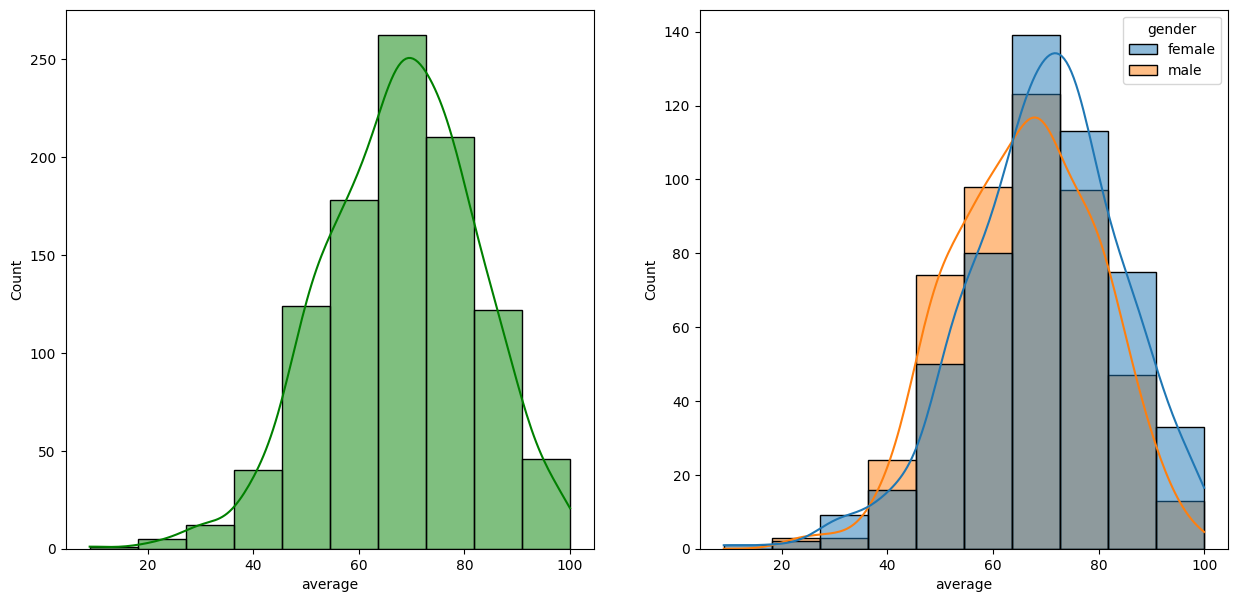

In [405]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=10,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',bins=10,kde=True,hue='gender')
plt.show()

In [406]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [407]:
df.drop(columns=['average'],axis=1,inplace=True)

In [408]:
X=df.drop(columns=['math score'] ,axis=1)
y=df['math score']
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [409]:
num_feat=X.select_dtypes(exclude='object').columns
cat_feat=X.select_dtypes(include='object').columns
print(len(num_feat),len(cat_feat))



2 5


In [410]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_trans=StandardScaler()
cat_trans=OneHotEncoder()
preprocessor=ColumnTransformer(
     transformers =[('numerical',num_trans,num_feat)
                  ,
    ('categorical',cat_trans,cat_feat)],
     remainder='passthrough'
   
)

In [411]:
X=preprocessor.fit_transform(X)
y


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [412]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape ,X_test.shape


((800, 19), (200, 19))

In [413]:
def evaluate(true,predicted):
    mae=mean_absolute_error(true,predicted)
    r2_square=r2_score(true,predicted)
    mse=mean_squared_error(true,predicted)
    
    return mae,r2_square,mse

In [414]:
models=[
 ('Adaboost',AdaBoostRegressor()),
 ('XGBoost',XGBRegressor()),
 ('Linear Regression',LinearRegression()),
 ('Lasso',Lasso()),
 ('Ridge',Ridge()),
]


In [415]:
for model_name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    ev_mae,ev_r2_score,ev_mse=evaluate(y_test,y_pred)
    print("Model:",model_name)
    print("Mean Absolute Error:",ev_mae)
    print("Mean Squared Error: ",ev_mse)
    print('R2 Score:           ',ev_r2_score)
    

Model: Adaboost
Mean Absolute Error: 4.66944722429418
Mean Squared Error:  35.992592883524345
R2 Score:            0.8520883145302001
Model: XGBoost
Mean Absolute Error: 5.103629446029663
Mean Squared Error:  43.50391987982302
R2 Score:            0.8212205171585083
Model: Linear Regression
Mean Absolute Error: 4.214763142474851
Mean Squared Error:  29.095169866715487
R2 Score:            0.8804332983749565
Model: Lasso
Mean Absolute Error: 5.157879138921817
Mean Squared Error:  42.50633235127345
R2 Score:            0.825320079562973
Model: Ridge
Mean Absolute Error: 4.211100688014259
Mean Squared Error:  29.056272192348278
R2 Score:            0.8805931485028738
